# OMI SO2 NO2 Onboarding Demo

In [1]:
import datetime as dt
from IPython.display import display, JSON
from harmony import BBox, Client, Collection, Request
from harmony.config import Environment
import os
import netCDF4 as nc4
import numpy as np
import xarray as xr
import tranform_he5

## Flattening he5 files using h5py
### - before: with original granuale

In [13]:
!h5ls -r OMI-Aura_L2-OMSO2_2020m0116t1207-o82471_v003-2020m0223t142939.he5

/                        Group
/HDFEOS                  Group
/HDFEOS/ADDITIONAL       Group
/HDFEOS/ADDITIONAL/FILE_ATTRIBUTES Group
/HDFEOS/SWATHS           Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2 Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/AlgorithmFlag_SnowIce Dataset {1997, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/CloudFraction Dataset {1997, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/CloudPressure Dataset {1997, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/CloudRadianceFraction Dataset {1997, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountO3 Dataset {1997, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2 Dataset {1997, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2_PBL Dataset {1997, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amoun

### - after flattening

In [14]:
!h5ls -r input.nc

/                        Group
/__HDFEOS\ INFORMATION__ArchivedMetadata Dataset {SCALAR}
/__HDFEOS\ INFORMATION__CoreMetadata Dataset {SCALAR}
/__HDFEOS\ INFORMATION__StructMetadata.0 Dataset {SCALAR}
/__HDFEOS__ADDITIONAL__FILE_ATTRIBUTES Group
/__HDFEOS__SWATHS__OMI\ Total\ Column\ Amount\ SO2__Data\ Fields__AlgorithmFlag_SnowIce Dataset {1997, 60}
/__HDFEOS__SWATHS__OMI\ Total\ Column\ Amount\ SO2__Data\ Fields__CloudFraction Dataset {1997, 60}
/__HDFEOS__SWATHS__OMI\ Total\ Column\ Amount\ SO2__Data\ Fields__CloudPressure Dataset {1997, 60}
/__HDFEOS__SWATHS__OMI\ Total\ Column\ Amount\ SO2__Data\ Fields__CloudRadianceFraction Dataset {1997, 60}
/__HDFEOS__SWATHS__OMI\ Total\ Column\ Amount\ SO2__Data\ Fields__ColumnAmountO3 Dataset {1997, 60}
/__HDFEOS__SWATHS__OMI\ Total\ Column\ Amount\ SO2__Data\ Fields__ColumnAmountSO2 Dataset {1997, 60}
/__HDFEOS__SWATHS__OMI\ Total\ Column\ Amount\ SO2__Data\ Fields__ColumnAmountSO2_PBL Dataset {1997, 60}
/__HDFEOS__SWATHS__OMI\ Total\ Colum

## Before decoding times

In [15]:

nc_dataset = nc4.Dataset('input.nc')
print (np.array(nc_dataset.variables['__HDFEOS__SWATHS__OMI Total Column Amount SO2__Geolocation Fields__Time']))


[8.53331017e+08 8.53331019e+08 8.53331021e+08 ... 8.53335005e+08
 8.53335007e+08 8.53335009e+08]


## After decoding times

In [16]:
args = {
    'decode_coords': False,
    'mask_and_scale': False,
    'decode_times': True
}
with xr.open_dataset(
        xr.backends.NetCDF4DataStore(nc_dataset),
        **args
) as dataset:
    print (dataset['__HDFEOS__SWATHS__OMI Total Column Amount SO2__Geolocation Fields__Time'])

<xarray.DataArray '__HDFEOS__SWATHS__OMI Total Column Amount SO2__Geolocation Fields__Time' (phony_dim_0: 1997)>
array([8.53331e+08, 8.53331e+08, 8.53331e+08, ..., 8.53335e+08, 8.53335e+08,
       8.53335e+08])
Dimensions without coordinates: phony_dim_0
Attributes:
    Units:         seconds since 1993-01-01
    Title:         Time at Start of Scan (TAI93)
    ValidRange:    [-5.e+09  1.e+10]
    _FillValue:    -1.2676506002282294e+30
    MissingValue:  -1.2676506002282294e+30


### Unfortunately xarry doesn't decode tai93 for OMI he5 files - added an extra wrinkle

### Solutions: Use variable attributes to decode times for some cases - other cases will use UTC time var for temporal subsetting

### EarthData Search UAT Variable Subsetting

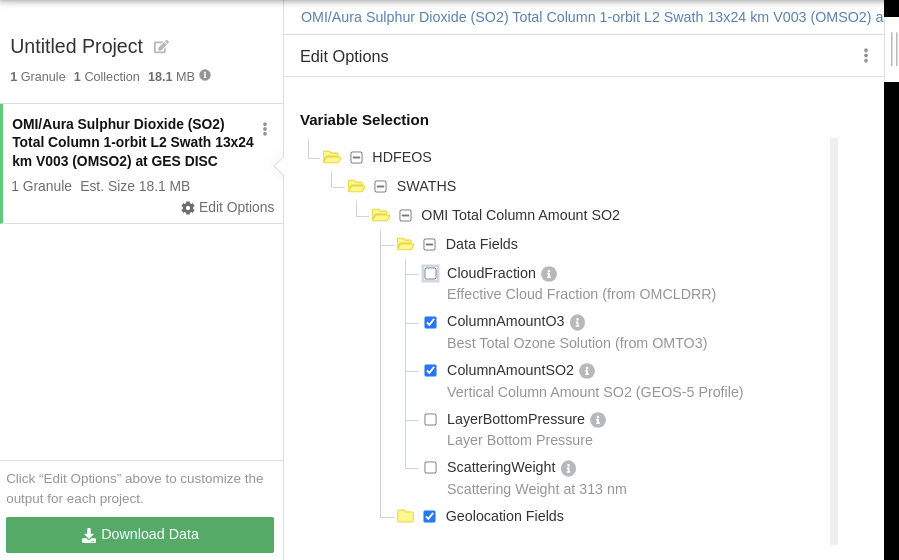

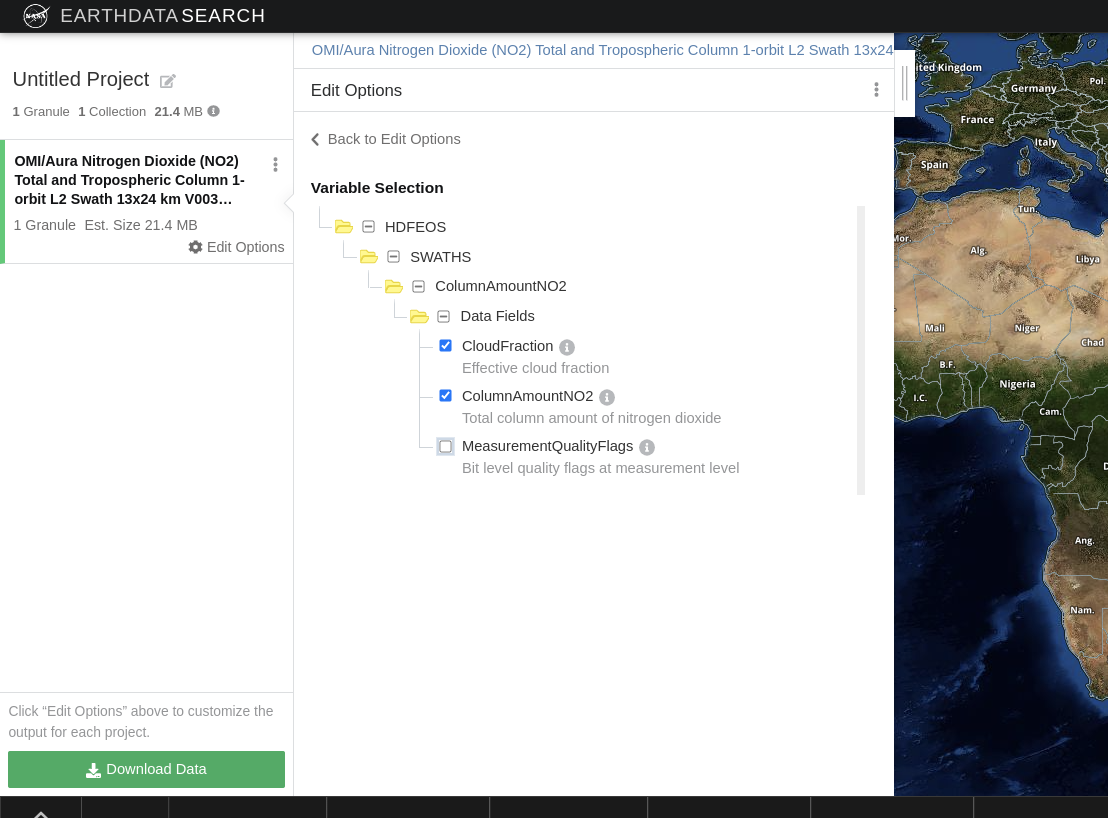

https://harmony.uat.earthdata.nasa.gov/service-results/harmony-uat-staging/public/podaac/l2-subsetter/ea2d26d7-6503-4525-9241-046546916dc3/OMI-Aura_L2-OMSO2_2022m0110t1543-o93031_v003-2022m0111t023631_subsetted.nc4

## New OMSO2 downloaded file is subsetted variably

In [17]:
!h5ls -r OMI-Aura_L2-OMSO2_2022m0110t1543-o93031_v003-2022m0111t023631_subsetted.nc4

/                        Group
/HDFEOS                  Group
/HDFEOS/SWATHS           Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2 Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountO3 Dataset {1644, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2 Dataset {1644, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/Latitude Dataset {1644, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/Longitude Dataset {1644, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/TiledCornerLatitude Dataset {1644, 60, 4}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/Time Dataset {1644}
/phony_dim_0             Dataset {1644}
/phony_dim_1             Dataset {60}
/phony_dim_3             Dataset {4}


In [10]:
def harmony_request_UAT(my_id, boundingbox, variables, my_start, my_stop):
    harmony_client = Client(env=Environment.UAT)
    collection = Collection(id=my_id)

    request = Request(
        collection=collection,
        spatial=BBox(boundingbox[0],boundingbox[1],boundingbox[2],boundingbox[3]),
        temporal = {
           'start': my_start,
           'stop' : my_stop
        },
        #variables = variables,
        max_results=1
    )
    job_id = harmony_client.submit(request)
    myURL = 'https://harmony.uat.earthdata.nasa.gov/jobs/'+job_id
    print (myURL)
    harmony_client.wait_for_processing(job_id, show_progress=True)
    results = harmony_client.download_all(job_id, directory='tests/data', overwrite=True)
    file_names = [f.result() for f in results]
    print (file_names)
    return file_names[0]

In [5]:
def harmony_request_UAT_no2(my_id, boundingbox, variables):
    harmony_client = Client(env=Environment.UAT)
    collection = Collection(id=my_id)

    request = Request(
        collection=collection,
        spatial=BBox(boundingbox[0],boundingbox[1],boundingbox[2],boundingbox[3]),
        variables = variables,
        max_results=1
    )
    job_id = harmony_client.submit(request)
    myURL = 'https://harmony.uat.earthdata.nasa.gov/jobs/'+job_id
    print (myURL)
    harmony_client.wait_for_processing(job_id, show_progress=True)
    results = harmony_client.download_all(job_id, directory='tests/data', overwrite=True)
    file_names = [f.result() for f in results]
    print (file_names)
    return file_names[0]

## UAT Harmony Subsetting

### original granule for OMI SO2 collection

In [11]:
!h5ls -r tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400.he5

/                        Group
/HDFEOS                  Group
/HDFEOS/ADDITIONAL       Group
/HDFEOS/ADDITIONAL/FILE_ATTRIBUTES Group
/HDFEOS/SWATHS           Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2 Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/AlgorithmFlag_SnowIce Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/CloudFraction Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/CloudPressure Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/CloudRadianceFraction Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountO3 Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2 Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2_PBL Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amoun

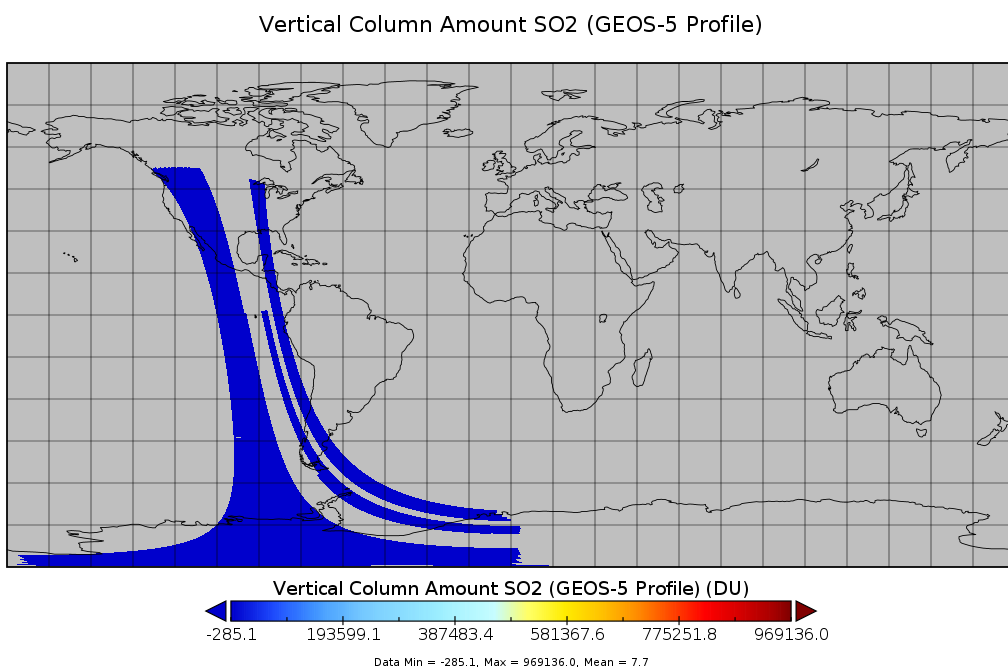

### variable subset

In [6]:
test_file = harmony_request_UAT('C1215720341-GES_DISC', (-180,-90,180,90), ['/HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountO3',
                                                                            '/HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountSO2'], 
                                            dt.datetime(2022,1,10,19,20), dt.datetime(2022,1,10,21,30))

https://harmony.uat.earthdata.nasa.gov/jobs/30663ca1-9097-46f1-91c0-654a2e91b5a5


 [ Processing: 100% ] |###################################################| [|]


['tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400_subsetted.nc4']


In [20]:
!h5ls -r tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400_subsetted.nc4

/                        Group
/HDFEOS                  Group
/HDFEOS/SWATHS           Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2 Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/AlgorithmFlag_SnowIce Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/CloudFraction Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/CloudPressure Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/CloudRadianceFraction Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountO3 Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2 Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2_PBL Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2_STL Dataset {1643, 60}
/HDFEOS/SWATH

### bounding box subset

In [7]:
test_file = harmony_request_UAT('C1215720341-GES_DISC', (-180,-30,180,0), ['/HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountO3',
                                                                            '/HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountSO2'], 
                                            dt.datetime(2022,1,10,19,20), dt.datetime(2022,1,10,21,30))

https://harmony.uat.earthdata.nasa.gov/jobs/67f6e1e7-1199-4b90-a028-5988aaacead2


 [ Processing: 100% ] |###################################################| [|]


['tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400_subsetted.nc4']


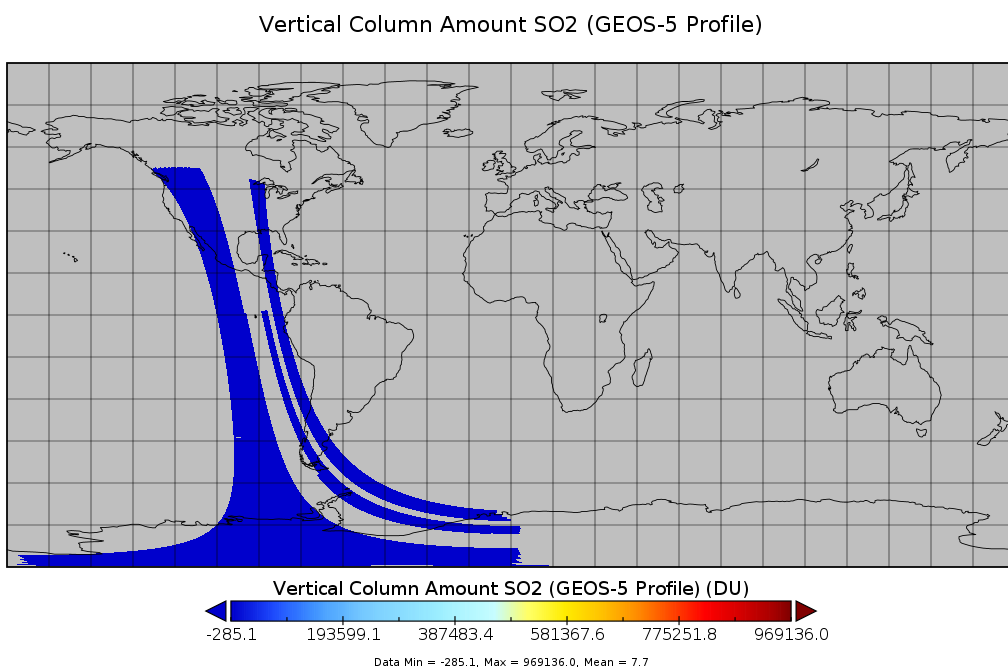

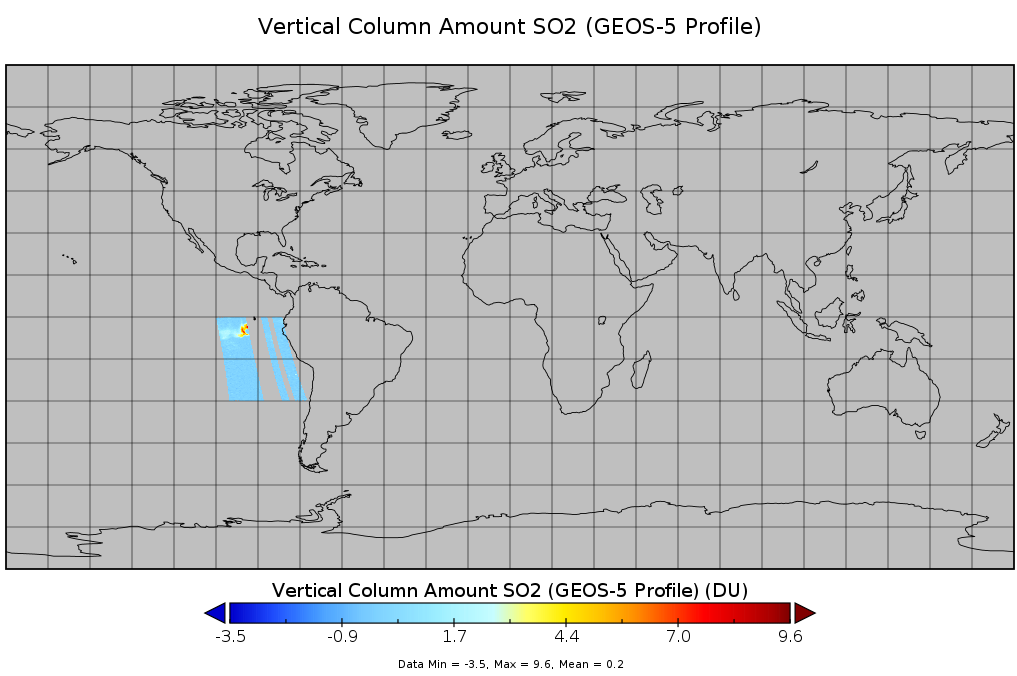

### temporal subset

In [8]:
test_file = harmony_request_UAT('C1215720341-GES_DISC', (-180,-90,180,90), ['/HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountO3',
                                                                            '/HDFEOS/SWATHS/OMI Total Column Amount SO2/Data Fields/ColumnAmountSO2'], 
                                            dt.datetime(2022,1,10,19,40), dt.datetime(2022,1,10,20,10))

https://harmony.uat.earthdata.nasa.gov/jobs/c3ab33ec-e0e3-4948-87e8-1f25a7aef29a


 [ Processing: 100% ] |###################################################| [|]


['tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400_subsetted.nc4']


In [6]:
!h5ls -r tests/data/OMI-Aura_L2-OMSO2_2022m0110t1900-o93033_v003-2022m0111t140400_subsetted.nc4

/                        Group
/HDFEOS                  Group
/HDFEOS/SWATHS           Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2 Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountO3 Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Data\ Fields/ColumnAmountSO2 Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields Group
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/Latitude Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/Longitude Dataset {1643, 60}
/HDFEOS/SWATHS/OMI\ Total\ Column\ Amount\ SO2/Geolocation\ Fields/Time Dataset {1643}
/phony_dim_0             Dataset {1643}
/phony_dim_1             Dataset {60}


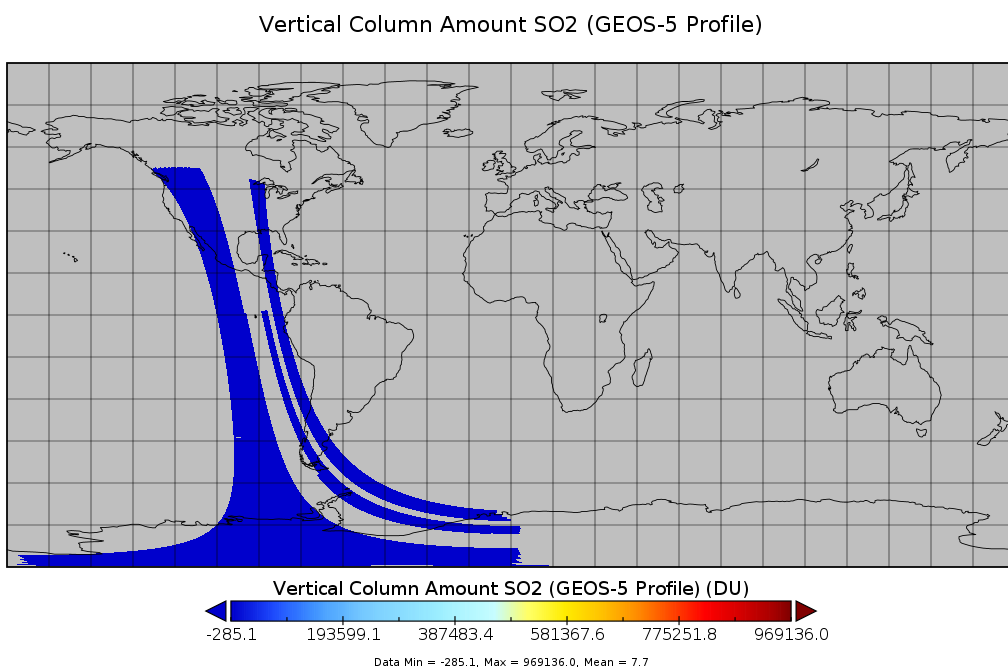

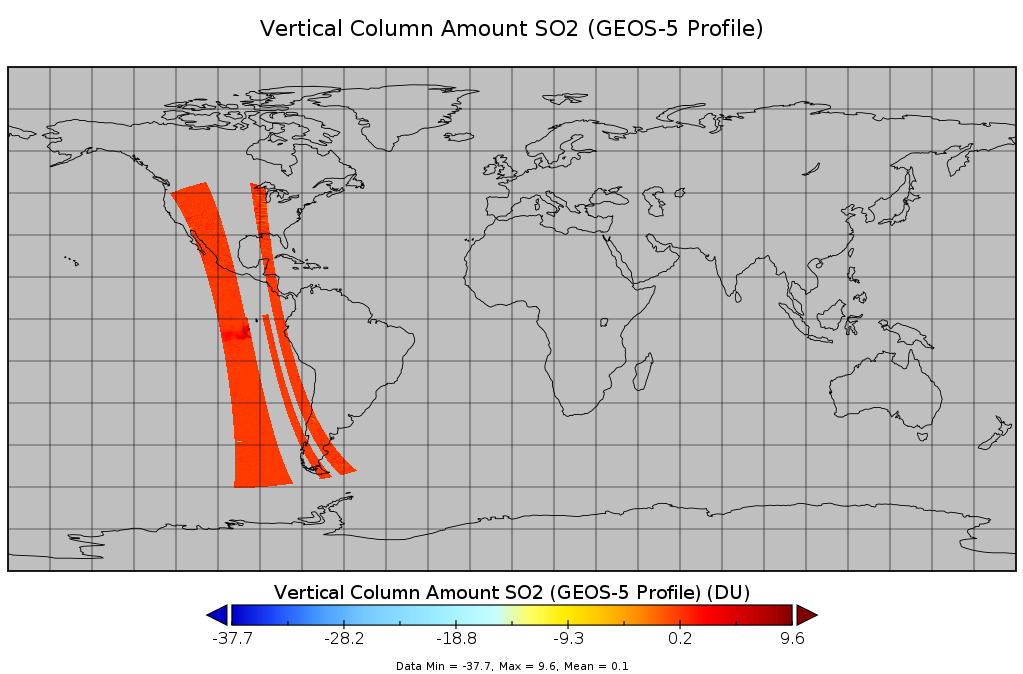

## OMNO2 Data collection
### bounding box and variable example

In [ ]:
test_file = harmony_request_UAT_no2('C1215720126-GES_DISC', (-180,-90,180,90), ['/HDFEOS/SWATHS/ColumnAmountNO2/Data Fields/CloudFraction',
                                                                            '/HDFEOS/SWATHS/ColumnAmountNO2/Data Fields/MeasurementQualityFlags',],
                                                               )

In [11]:
test_file = harmony_request_UAT('C1215720126-GES_DISC', (-180,-10,180,10),['/HDFEOS/SWATHS/ColumnAmountNO2/Data Fields/CloudFraction',
                                                                            '/HDFEOS/SWATHS/ColumnAmountNO2/Data Fields/MeasurementQualityFlags'],
                                                                   dt.datetime(2022,1,10,19,0), dt.datetime(2022,1,10,20,10))


https://harmony.uat.earthdata.nasa.gov/jobs/5d84fa97-1f97-4b77-8e06-ef43aa97a311


 [ Processing: 100% ] |###################################################| [|]


['tests/data/OMI-Aura_L2-OMNO2_2005m0101t0020-o02472_v003-2019m0916t165727_subsetted.nc4']


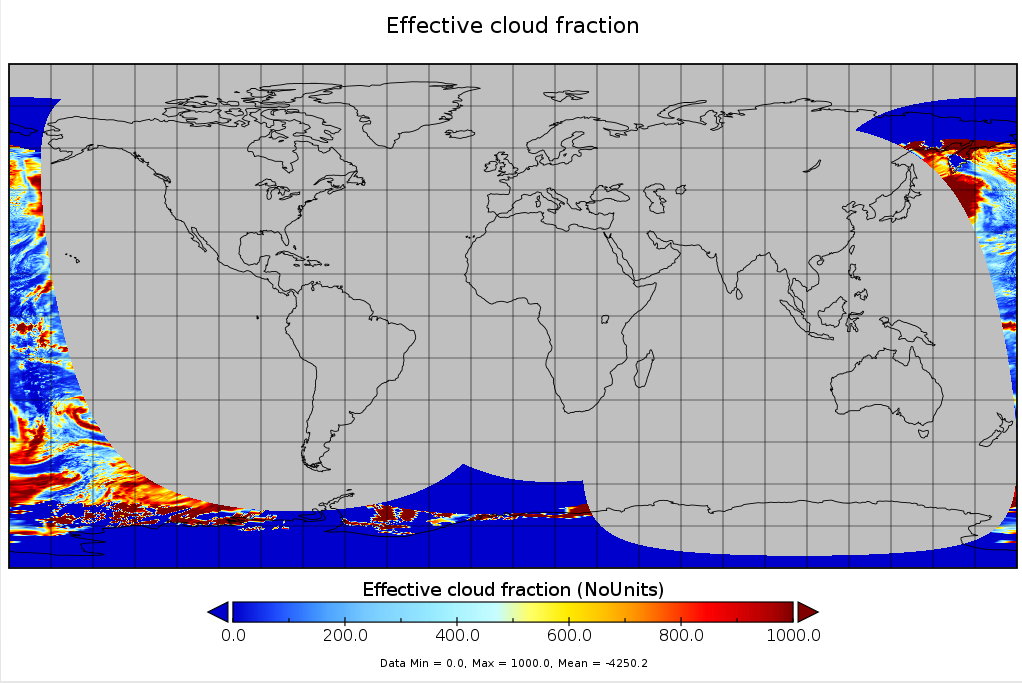

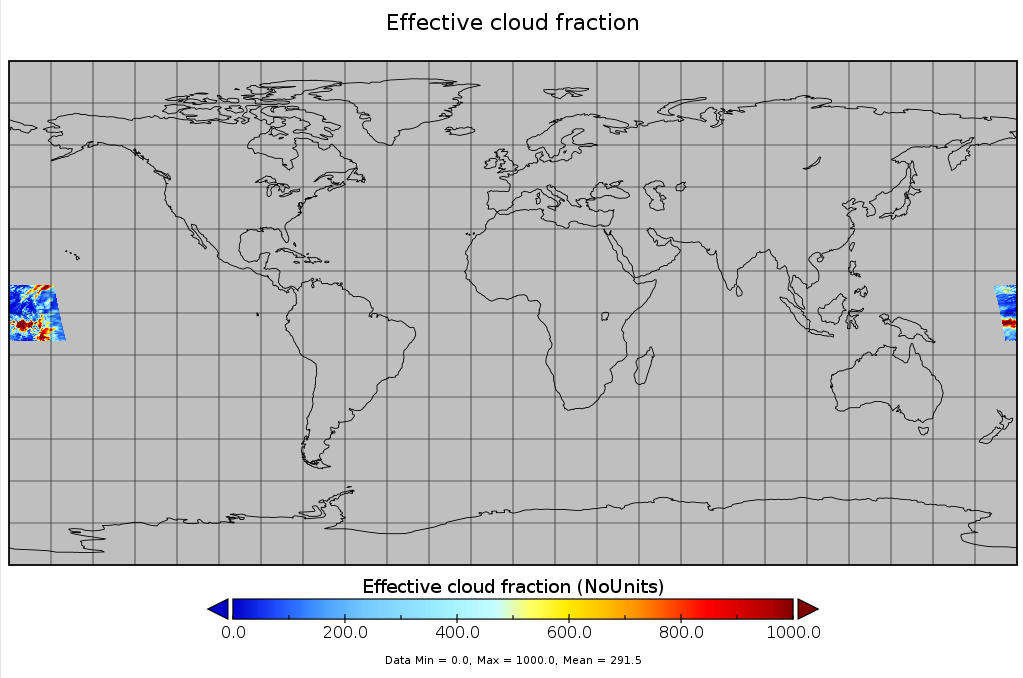

## SNDR test files

In [9]:
test_file = harmony_request_UAT('C1232995291-GES_DISC', (-180,-90,180,90),['/surf_temp'],
                                                                   dt.datetime(2016,12,12,1,6), dt.datetime(2018,12,12,1,10))

https://harmony.uat.earthdata.nasa.gov/jobs/631c405c-e21a-48ac-b89e-10d21ac794de


 [ Processing: 100% ] |###################################################| [|]


['tests/data/SNDR.SNPP.CRIMSS.20170101T0000.m06.g001.L2_CLIMCAPS_RET.std.v02_28.G.200302214839_surf_temp_subsetted.nc4']


In [17]:
test_file = harmony_request_UAT('C1232995291-GES_DISC', (-180,-90,180,90),['/surf_temp'],
                                                                   dt.datetime(2016,12,12,1,6), dt.datetime(2018,12,12,1,10))

https://harmony.uat.earthdata.nasa.gov/jobs/15b17ed8-d0be-47a9-ac13-c65d93ff4cd9


 [ Processing: 100% ] |###################################################| [|]


['tests/data/SNDR.SNPP.CRIMSS.20170101T0000.m06.g001.L2_CLIMCAPS_RET.std.v02_28.G.200302214839_surf_temp_subsetted.nc4']


In [18]:
test_file = harmony_request_UAT('C1232995291-GES_DISC', (-180,-75,180,-65),['/surf_temp'],
                                                                   dt.datetime(2016,12,12,1,6), dt.datetime(2018,12,12,1,10))

https://harmony.uat.earthdata.nasa.gov/jobs/2cca1df1-95e3-4f11-9314-74a789053b04


 [ Processing: 100% ] |###################################################| [|]


['tests/data/SNDR.SNPP.CRIMSS.20170101T0000.m06.g001.L2_CLIMCAPS_RET.std.v02_28.G.200302214839_surf_temp_subsetted.nc4']


In [20]:
test_file = harmony_request_UAT('C1232995291-GES_DISC', (-180,-90,180,90),['/surf_temp'],
                                                                   dt.datetime(2017,1,1,0,0,10), dt.datetime(2017,1,1,0,0,59))

https://harmony.uat.earthdata.nasa.gov/jobs/039b73a3-125c-4fbd-b0af-b4597a87cd4c


 [ Processing: 100% ] |###################################################| [|]


['tests/data/SNDR.SNPP.CRIMSS.20170101T0000.m06.g001.L2_CLIMCAPS_RET.std.v02_28.G.200302214839_surf_temp_subsetted.nc4']


In [22]:
test_file = harmony_request_UAT('C1232998567-GES_DISC', (-180,-90,180,90),['/surf_temp'],
                                                                   dt.datetime(2018,2,17,0,0,0), dt.datetime(2018,2,17,0,0,50))

https://harmony.uat.earthdata.nasa.gov/jobs/43709fed-44be-4b80-9d76-69ec39f2ae65


 [ Processing: 100% ] |###################################################| [|]


['tests/data/SNDR.J1.CRIMSS.20180217T0000.m06.g001.L2_CLIMCAPS_RET.std.v02_28.G.200221153452_surf_temp_subsetted.nc4']


In [24]:
test_file = harmony_request_UAT('C1232998567-GES_DISC', (-180,-90,180,90),['/surf_temp'],
                                                                   dt.datetime(2018,2,17,0,0,0), dt.datetime(2018,2,17,0,1,50))

https://harmony.uat.earthdata.nasa.gov/jobs/533d6448-5634-4f41-904e-431e36d77715


 [ Processing: 100% ] |###################################################| [|]


['tests/data/SNDR.J1.CRIMSS.20180217T0000.m06.g001.L2_CLIMCAPS_RET.std.v02_28.G.200221153452_surf_temp_subsetted.nc4']


In [3]:
test_file = harmony_request_UAT('C1232998567-GES_DISC', (15,-70,25,70),['/surf_temp'],
                                                                   dt.datetime(2018,2,17,0,0,0), dt.datetime(2018,2,17,0,1,50))

https://harmony.uat.earthdata.nasa.gov/jobs/4d3a0781-2c60-4e40-8566-391ec946993e


 [ Processing: 100% ] |###################################################| [|]


['tests/data/SNDR.J1.CRIMSS.20180217T0000.m06.g001.L2_CLIMCAPS_RET.std.v02_28.G.200221153452.nc4']


In [28]:
test_file = harmony_request_UAT('C1232998567-GES_DISC', (15,-90,30,90),['/surf_temp'],
                                                                   dt.datetime(2018,2,17,0,0,0), dt.datetime(2018,2,17,0,5,50))

https://harmony.uat.earthdata.nasa.gov/jobs/3852d377-3a0a-4352-a5e2-c8f227478b43


 [ Processing: 100% ] |###################################################| [|]


['tests/data/SNDR.J1.CRIMSS.20180217T0000.m06.g001.L2_CLIMCAPS_RET.std.v02_28.G.200221153452_surf_temp_subsetted.nc4']


## S5P Files

In [11]:
test_file = harmony_request_UAT('C1236469823-GES_DISC', (-120,-90,180,80),['/surf_temp'],
                                                                   dt.datetime(2020,7,13,0,0,0), dt.datetime(2020,7,13,1,5,50))

https://harmony.uat.earthdata.nasa.gov/jobs/1f098b99-cf16-4374-914b-0962d4d642b4


 [ Processing: 100% ] |###################################################| [|]


['tests/data/S5P_OFFL_L2_SO2_20200713T002730_20200713T020900_14239_01_020103_20200721T191355_subsetted.nc4']
